In [1]:
%matplotlib nbagg

In [2]:
import jefimenko
import numpy as np
import pdb

Jefimenko version 0.0.1


In [3]:
def test_charge_1():
    mapping = jefimenko.Grid(1,   # creat a 1D grid
                delta=[1],  # this is the size of a step in x, y and z in meters
                size=[10],  # this is the size of the grid in meters
                time=10 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
 
    mapping.Add_Charge([0], Q = 1)
    jefimenko.plot_grid(mapping)

    jefimenko.simulate(mapping)

    if(mapping.grid['E'][0][1] == [0, 0, 0]).all():
        print("time == 0 R == 1 E field PASS")
    else:
        print("time = 0 R == 1 E field FAIL")

    if(mapping.grid['H'][0][1] == [0, 0, 0]).all():
        print("time == 0 R == 1 H field PASS")
    else:
        print("time == 0 R == 1 H field FAIL")

    test_array = [8987551787.368176, 0, 0]

    if (mapping.grid['E'][1][1] - test_array < .01).all():
        percent = (np.linalg.norm(mapping.grid['E'][1][1] - 8987551787.368176) / 8987551787.368176)
        print("time == 1 R == 1 E filed PASS")
        # print("E field is within " + str(percent) + " percent at time = 1")
        # print("E field is " + str(mapping.grid['E'][1][1]))
    else:
        print("time == 0 R == 1 E field FAIL")   

    test_array = [2246887946.842, 0, 0]
    if (mapping.grid['E'][1][2] - test_array < .01).all():
        print("time == 1 R == 2 E field Pass")
    else:
        print("time == 1 R == 2 E field Fail")
        print(mapping.grid['E'][1][2])
        
    if(mapping.grid['H'][1][1] == [0, 0, 0]).all():
        print("time == 1 R == 1 H field PASS")
    else:
        print("time == 1 R == 1 H field FAIL")
    #for t in range(mapping.time_size):
    #    jefimenko.plot_EM_grid('E', mapping, time=t)

    #field = jefimenko.print_location(mapping.grid['E'][1], [1, 0], mapping)
    #print(field)
    #jefimenko.plot_EM_grid('E', mapping, time=9)

location = [0]Q = 1


<IPython.core.display.Javascript object>


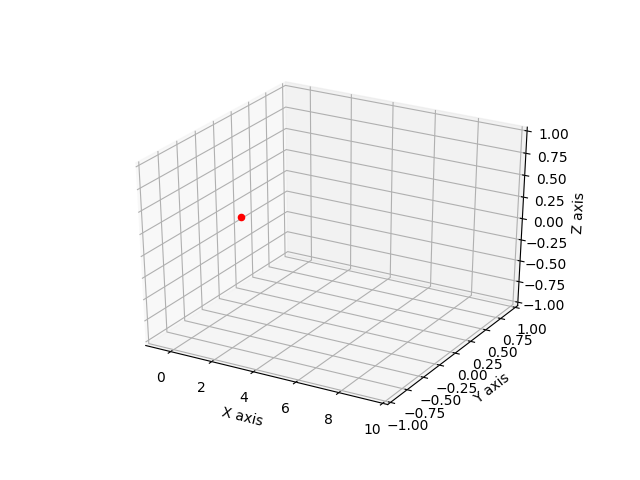

shape = 1
simulating grid
grid simulated
time == 0 R == 1 E field PASS
time == 0 R == 1 H field PASS
time == 1 R == 1 E filed PASS
time == 1 R == 2 E field Pass
time == 1 R == 1 H field PASS


In [4]:
test_charge_1()

In [5]:
# pdb.pm()

In [6]:
def test_current_1():
    mapping = jefimenko.Grid(1,   # creat a 1D grid
                delta=[1],  # this is the size of a step in x, y and z
                size=[10],  # this is the size of the grid in meters
                time=3 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    mapping.Add_Current([0],
                    direction=[0, 0, 1],
                    Amps=1/(np.linalg.norm(mapping.delta)))

    jefimenko.plot_grid(mapping)

    U_0 = jefimenko.U_0

    for i in range(len(mapping.currents[0])):
        print('amps = ' + str(mapping.currents[0][i].amps))
        print('direction = ' + str(mapping.currents[0][i].direction))
        print('location = '+ str(mapping.currents[0][i].location))
        print('')
    jefimenko.simulate(mapping)

    if(mapping.grid['H'][0][1] == [0, 0, 0]).all():
        print("time == 0 PASS")
    else:
        print("time == 0 Fail")
    test_array = [0, 2*10**-7, 0]

    percent = abs((np.linalg.norm(U_0 * mapping.grid['H'][1][1] - test_array) / (2*10**-7)) * 100)

    if percent <= 1:
        print("time == 1 R == 1 PASS")
    else:
        print("H field is within " + str( percent) + " percent at time = 1")
        print("time = 1 FAIL")
        print(mapping.grid['H'][1][1][1])

    test_array = [0, 1*10**-7, 0]
    percent = abs((np.linalg.norm(U_0 * mapping.grid['H'][2][2] - test_array) / (1*10**-7)) * 100)

    if percent <= 1:
        print("time == 2 R == 2 PASS")
    else:
        print("H field is within " + str( percent) + " percent at time = 2 R == 2")
        print("time = 2 FAIL")
        print(mapping.grid['H'][2][2][1])   


location = [0]amps = 1.0


<IPython.core.display.Javascript object>


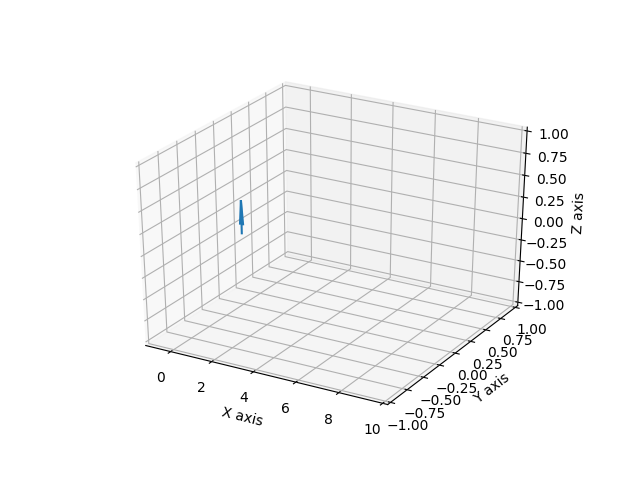

shape = 1
amps = 1.0
direction = [0. 0. 1.]
location = [0.]

simulating grid
grid simulated
time == 0 PASS
time == 1 R == 1 PASS
time == 2 R == 2 PASS


In [7]:
test_current_1()

In [8]:
def test_current_2():
    # time = 99
    time = 50
    #r = 10
    r = 50

    mapping = jefimenko.Grid(1,   # creat a 1D grid
                delta=[1],  # this is the size of a step in x, y and z
                size=[r + 1],  # this is the size of the grid in meters
                time=(time + 1) * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    delta_t = 3.36 * 10**-9
    mapping.Add_Current([0],
                    direction=[0, 1, 0],
                    Amps=1/(np.linalg.norm(mapping.delta)))

    #jefimenko.plot_grid(mapping)

    for i in range(len(mapping.currents[0])):
        print('amps = ' + str(mapping.currents[0][i].amps))
        print('direction = ' + str(mapping.currents[0][i].direction))
        print('location = '+ str(mapping.currents[0][i].location))
        print('')

    w = 2 * np.pi

    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
    
    pass_count = 0
    fail_count = 0
    pass_count_E = 0
    fail_count_E = 0
    
    scale = np.linalg.norm([1]) / (4 * np.pi)
    
    I_0 = 1
    for t in range(time + 1):
        mapping.Modify_Current(0, time=t * delta_t, amps=I_0 * np.sin(t * delta_t * w))

    jefimenko.simulate(mapping)
    # for t in range(mapping.time_size):
    #     jefimenko.plot_EM_grid('H', mapping, time=t)

    # for t in range(mapping.time_size):
    # for t in range(10):
    #    jefimenko.plot_EM_grid('H', mapping, time=t)

    # jefimenko.plot_EM_grid('H', mapping, time=time-1)

    
    for test_time in range(time + 1):
        for test_r in range(1, test_time):

            test_array_E_1 = [0,- I_0 * w * np.cos(w * (test_time - test_r / C_0)) / (4 * np.pi * E_0 * test_r * C_0**2), 0 ]
            test_array_E_2 = [0, -I_0 * np.sin(w * (test_time * delta_t - test_r / C_0)) / (test_r**2 * E_0 * 2 * np.pi * C_0), 0]
            
            test_array_E = [test_array_E_1[0] + test_array_E_2[0], test_array_E_1[1] + test_array_E_2[1], test_array_E_1[2] + test_array_E_2[2]]

            test_array_H_1 = [0, 0, - 1 * I_0 * w * np.cos(w * (test_time * delta_t - test_r / C_0)) / (4 * np.pi * test_r * C_0)]
            test_array_H_2 = [0, 0, - scale * I_0 * np.sin(w * (test_time * delta_t - test_r / C_0)) * 2 / test_r ]

            test_array_H = [test_array_H_1[0] + test_array_H_2[0], test_array_H_1[1] + test_array_H_2[1], test_array_H_1[2] + test_array_H_2[2]]

            percent_E = abs((np.linalg.norm(mapping.grid['E'][test_time][test_r] - test_array_E) / np.linalg.norm(test_array_E)) * 100)
            percent_H = abs((np.linalg.norm(mapping.grid['H'][test_time][test_r] - test_array_H) / np.linalg.norm(test_array_H)) * 100)

            if percent_E <= 5:
                pass_count_E  = pass_count_E + 1

            else:
                fail_count_E = fail_count_E + 1

            if percent_H <= 5:
                pass_count  = pass_count + 1
            else:
                fail_count = fail_count + 1

    print('E field pass count = ' + str(pass_count_E))
    print('E fiels fail count = ' + str(fail_count_E))
    if fail_count_E < 120:
        print('this is curently exseptable')
    print() 
    print('H field pass count = ' + str(pass_count))
    print('H field fail count = ' + str(fail_count))
    if fail_count < 120:
        print('this is curently exseptable')
    

In [9]:
test_current_2()


location = [0]amps = 1.0
amps = 1.0
direction = [0. 1. 0.]
location = [0.]

simulating grid
grid simulated
E field pass count = 1225
E fiels fail count = 0
this is curently exseptable

H field pass count = 1114
H field fail count = 111
this is curently exseptable


In [10]:
def test_current_3():
    time = 50
    r = 50

    mapping = jefimenko.Grid(1,   # creat a 1D grid
                delta=[1],  # this is the size of a step in x, y and z
                size=[r + 1],  # this is the size of the grid in meters
                time=(time + 1) * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    delta_t = 3.36 * 10**-9
    mapping.Add_Current([0],
                    direction=[0, 0, 1],
                    Amps=1/(np.linalg.norm(mapping.delta)))

    for i in range(len(mapping.currents[0])):
        print('amps = ' + str(mapping.currents[0][i].amps))
        print('direction = ' + str(mapping.currents[0][i].direction))
        print('location = '+ str(mapping.currents[0][i].location))
        print('')

    w = 2 * np.pi

    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
    
    pass_count = 0
    fail_count = 0
    pass_count_E = 0
    fail_count_E = 0
    
    scale = np.linalg.norm([1]) / (4 * np.pi)
    
    I_0 = 1
    for t in range(time + 1):
        mapping.Modify_Current(0, time=t * delta_t, amps=I_0 * np.sin(t * delta_t * w))

    jefimenko.simulate(mapping)
    
    for test_time in range(time + 1):
        for test_r in range(1, test_time):

            test_array_E_1 = [0, 0,- I_0 * w * np.cos(w * (test_time - test_r / C_0)) / (4 * np.pi * E_0 * test_r * C_0**2)]
            test_array_E_2 = [0, 0, -I_0 * np.sin(w * (test_time * delta_t - test_r / C_0)) / (test_r**2 * E_0 * 2 * np.pi * C_0)]

            test_array_E = [test_array_E_1[0] + test_array_E_2[0], test_array_E_1[1] + test_array_E_2[1], test_array_E_1[2] + test_array_E_2[2]]

            test_array_H_1 = [0, 1 * I_0 * w * np.cos(w * (test_time * delta_t - test_r / C_0)) / (4 * np.pi * test_r * C_0), 0]
            test_array_H_2 = [0, scale * I_0 * np.sin(w * (test_time * delta_t - test_r / C_0)) * 2 / test_r, 0]

            test_array_H = [test_array_H_1[0] + test_array_H_2[0], test_array_H_1[1] + test_array_H_2[1], test_array_H_1[2] + test_array_H_2[2]]

            percent_E = abs((np.linalg.norm(mapping.grid['E'][test_time][test_r] - test_array_E) / np.linalg.norm(test_array_E)) * 100)

            percent_H = abs((np.linalg.norm(mapping.grid['H'][test_time][test_r] - test_array_H) / np.linalg.norm(test_array_H)) * 100)

            if percent_E <= 5:
                pass_count_E  = pass_count_E + 1

            else:
                fail_count_E = fail_count_E + 1
                print('test percent at time t = ' + str(t))
                print(percent_E)
                print('test_array = ' + str(test_array_E))
                print(' true time = ' + str(t) + ' retarded time = ' + str(t_0))
                print(mapping.grid['E'][t_0][5, 5])
                print()


            if percent_H <= 5:
                pass_count  = pass_count + 1
            else:
                fail_count = fail_count + 1
                print('test percent at time t = ' + str(t))
                print(percent_H)
                print('test_array = ' + str(test_array_H))
                print(' true time = ' + str(t) + ' retarded time = ' + str(test_time))
                print(mapping.grid['H'][test_time][test_r])
                print()

    print('E field pass count = ' + str(pass_count_E))
    print('E fiels fail count = ' + str(fail_count_E))
    if fail_count_E < 120:
        print('this is curently exseptable')

    print()

    print('H field pass count = ' + str(pass_count))
    print('H field fail count = ' + str(fail_count))
    if fail_count < 120:
        print('this is curently exseptable')
    else:
        print('there is room for improvment')

In [11]:
test_current_3()

location = [0]amps = 1.0
amps = 1.0
direction = [0. 0. 1.]
location = [0.]

simulating grid
grid simulated
test percent at time t = 50
5.059689676686613
test_array = [0, 4.81433636744912e-10, 0]
 true time = 50 retarded time = 12
[0.00000000e+00+0.j 4.57074589e-10+0.j 0.00000000e+00+0.j]

test percent at time t = 50
5.494388826906168
test_array = [0, 4.433440876843762e-10, 0]
 true time = 50 retarded time = 13
[0.0000000e+00+0.j 4.1898504e-10+0.j 0.0000000e+00+0.j]

test percent at time t = 50
5.925125443287051
test_array = [0, 4.1111446924853815e-10, 0]
 true time = 50 retarded time = 14
[0.00000000e+00+0.j 3.86755421e-10+0.j 0.00000000e+00+0.j]

test percent at time t = 50
6.351953461180301
test_array = [0, 3.8348908201781945e-10, 0]
 true time = 50 retarded time = 15
[0.00000000e+00+0.j 3.59130034e-10+0.j 0.00000000e+00+0.j]

test percent at time t = 50
6.774925841515908
test_array = [0, 3.59547079751197e-10, 0]
 true time = 50 retarded time = 16
[0.00000000e+00+0.j 3.35188032e-10+0

test percent at time t = 50
5.486015964456316
test_array = [0, 4.4402072790711086e-10, 0]
 true time = 50 retarded time = 40
[0.0000000e+00+0.j 4.1966168e-10+0.j 0.0000000e+00+0.j]

test percent at time t = 50
7.125284821969152
test_array = [0, 3.418677095317424e-10, 0]
 true time = 50 retarded time = 40
[0.00000000e+00+0.j 3.17508662e-10+0.j 0.00000000e+00+0.j]

test percent at time t = 50
9.938770309489843
test_array = [0, 2.450911658077096e-10, 0]
 true time = 50 retarded time = 40
[0.00000000e+00+0.j 2.20732118e-10+0.j 0.00000000e+00+0.j]

test percent at time t = 50
15.892120213379249
test_array = [0, 1.5327752176183166e-10, 0]
 true time = 50 retarded time = 40
[0.00000000e+00+0.j 1.28918474e-10+0.j 0.00000000e+00+0.j]

test percent at time t = 50
5.629826042483998
test_array = [0, 4.326785203425535e-10, 0]
 true time = 50 retarded time = 41
[0.00000000e+00+0.j 4.08319472e-10+0.j 0.00000000e+00+0.j]

test percent at time t = 50
7.3037947852318545
test_array = [0, 3.33512218439289

notes on test_charge_3
# notice that the t = 8, 27 error seems to be do to a double addition of the field do to the charge 
# on the other hand t =74, 93 seem to be do to a cumpleat miss of of the field at those times
this will need to be fixed although it is not obiveus how

In [16]:
def test_charge_3():
    time_steps = 100
    # time_steps = 200
    delta = [1, 1]
    delta_t=3.36 * 10**-9
    mapping = jefimenko.Grid(2,   # creat a 2D grid
                delta=delta,  # this is the size of a step in x, y and z in meters
                size=[10, 10],  # this is the size of the grid in meters
                time=time_steps * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=delta_t  # this is the size of a full time step
        )
    
    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
 
    
    q = 1
    mapping.Add_Charge([0, 0], Q = q)

    # v = .1
    v = 10 / time_steps
    w = 2 * np.pi / time_steps
    for t in range(time_steps):
        mapping.modify_charge(0, t, location=[t * v, 0]) 

    jefimenko.plot_grid(mapping, time=0)
    jefimenko.plot_grid(mapping, time=time_steps - 1)
    
    jefimenko.simulate(mapping)

    jefimenko.plot_EM_grid('H', mapping, time=27)

    print(mapping.grid['E'][time_steps - 1][5, 5])

    test_E_pass_count = 0
    test_E_fail_count = 0
    test_fail_location_E = []
    test_fail_location_H = []
    test_H_pass_count = 0
    test_H_fail_count = 0

    for t in range(time_steps - 6):
        x = 5
        y = 5
        x = 5 - t * v
        R_0 = np.array([x, y, 0])
        r = np.linalg.norm(R_0)
        t_0 = int(t + (r / C_0)/delta_t)
        
        theta = np.arctan2(y, x)

        E_scale = q * (1 - v**2 / C_0**2) / (4 * np.pi * E_0 * r**3 * (1 - (v**2 / C_0**2) * np.sin(theta)**2 )**(3/2)) 
        test_array_E =  E_scale * R_0
        test_array_H = ((E_0) * np.cross(np.array([v, 0, 0]), test_array_E))

        percent_E = abs((np.linalg.norm(mapping.grid['E'][t_0][5, 5] - test_array_E ) / np.linalg.norm(test_array_E)) * 100)
        percent_H = abs((np.linalg.norm(mapping.grid['H'][t_0][5, 5] - test_array_H ) / np.linalg.norm(test_array_H)) * 100)

        if percent_E < 5:
            test_E_pass_count +=1
        else:
            test_E_fail_count += 1
            test_fail_location_E.append(t)
        if percent_E > 5:
            print('test percent at time t = ' + str(t))
            print('test array E = ' + str(test_array_E))
            print('simulated E field = ' + str(mapping.grid['E'][t_0][5, 5]))
            print('percent_E = ' + str(percent_E))
            if percent_E > 90:
                print('this one needs fixed')
            print()

        if percent_H < 5:  # note H test_array directly calculated from E test array
            test_H_pass_count +=1
        else:
            test_H_fail_count += 1
            test_fail_location_H.append(t)
            print('test percent at time t = ' + str(t))
            print('test array H = ' + str(test_array_H))
            print('simulated H field = ' + str(mapping.grid['H'][t_0][5, 5]))
            print('percent_H = ' + str(percent_H))
            print()

    print('E field specs')
    print('test pass count = ' + str(test_E_pass_count))
    print('test fail count = ' + str(test_E_fail_count))
    print('points of failure')
    print(test_fail_location_E)
    print()
    print('H field specs')
    print('test pass count = ' + str(test_H_pass_count))
    print('test fail count = ' + str(test_H_fail_count))
    print('points of failure')
    print(test_fail_location_H)

    if test_H_fail_count == 0:
        print('NOTHING NEEDS FIXED')

location = [0, 0]Q = 1


<IPython.core.display.Javascript object>


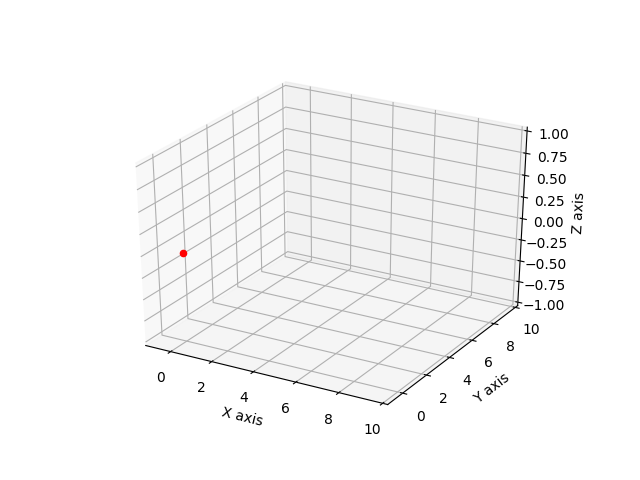

Shape = 2


<IPython.core.display.Javascript object>


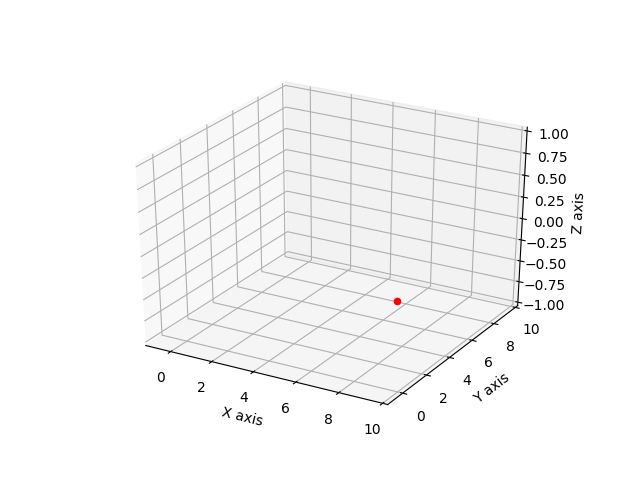

Shape = 2
simulating grid
grid simulated


<IPython.core.display.Javascript object>


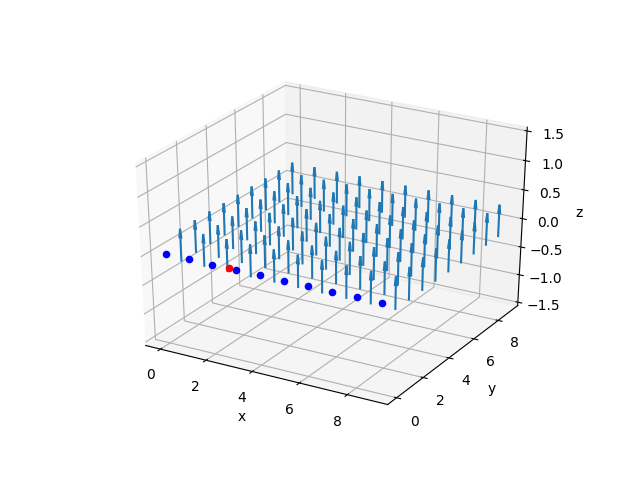

The acutal time is 9.072e-08
[0.+0.j 0.+0.j 0.+0.j]
test percent at time t = 8
test array E = [1.35570408e+08 1.61393343e+08 0.00000000e+00]
simulated E field = [2.70319470e+08+0.j 3.18078298e+08+0.j 0.00000000e+00+0.j]
percent_E = 98.0455277927779
this one needs fixed

test percent at time t = 8
test array H = [0.        0.        0.0001429]
simulated H field = [0.        +0.j 0.        +0.j 0.00028163+0.j]
percent_H = 97.08266355421489

test percent at time t = 27
test array E = [1.23999614e+08 2.69564377e+08 0.00000000e+00]
simulated E field = [2.50436313e+08+0.j 5.32974168e+08+0.j 0.00000000e+00+0.j]
percent_E = 98.47204166829087
this one needs fixed

test percent at time t = 27
test array H = [0.         0.         0.00023868]
simulated H field = [0.        +0.j 0.        +0.j 0.00047191+0.j]
percent_H = 97.71683989008643

test percent at time t = 74
test array E = [-1.26436700e+08  2.63409791e+08  0.00000000e+00]
simulated E field = [0.+0.j 0.+0.j 0.+0.j]
percent_E = 100.0
this o

In [17]:
test_charge_3()

In [14]:
def test_charge_4():
    time_steps = 150
    delta = [1, 1]
    delta_t = 3.36 * 10**-9
    
    mapping = jefimenko.Grid(2,   # creat a 2D grid
                delta=delta,  # this is the size of a step in x, y and z in meters
                size=[10, 10],  # this is the size of the grid in meters
                time=time_steps * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    
    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
 
    
    q = 1
    mapping.Add_Charge([0, 0], Q = q)

    r = 2
    w = 2 * np.pi / time_steps
    for t in range(time_steps):
        location = r * np.array([np.cos( w * t), np.sin( w * t)]) + np.array([5, 5])
        mapping.modify_charge(0, t, location=location) 

    jefimenko.plot_grid(mapping, time=0)
    jefimenko.plot_grid(mapping, time=int(time_steps/5))
    jefimenko.plot_grid(mapping, time=int(2*time_steps/5))
    jefimenko.plot_grid(mapping, time=int(3*time_steps/5))
    jefimenko.plot_grid(mapping, time=int(4*time_steps/5))

    test_E_pass_count = 0
    test_E_fail_count = 0
    test_fail_location = []
    test_H_pass_count = 0
    test_H_fail_count = 0

    jefimenko.simulate(mapping)

    for t in range (0, time_steps, int(time_steps / 5)):
        jefimenko.plot_EM_grid('H', mapping, time=t)
    

    print(mapping.grid['E'][time_steps - 1][5, 5])

    for t in range(time_steps - 2):
        
        t_0 = int(np.rint(t + (r / C_0)/delta_t))
        R_0 = - r * np.array([np.cos(w * t), np.sin(w * t), 0])
        v = w * r
        V_0 = v**2 / r**2 * r * np.array([- np.sin(w * t), np.cos(w * t), 0]) 
    
        test_array_E = (q / (4 * np.pi * E_0 * r**3) * (((1 - v**2 / C_0**2) *
                                                   np.cos(v/C_0) +
                                                   (v / C_0) * np.sin(v / C_0)) * R_0 +
                                                   ((1 - v **2 / C_0**2) * (r / v) *
                                                    np.sin(v / C_0) - r / C_0 *
                                                    np.cos(v / C_0)) * V_0))

        test_array_H = (q / (4 * np.pi * r**3) * v * r * np.array([0, 0, 1]))

        percent_E = abs((np.linalg.norm(mapping.grid['E'][t_0][5, 5] - test_array_E ) / np.linalg.norm(test_array_E)) * 100)
        percent_H = abs((np.linalg.norm(mapping.grid['H'][t_0][5, 5] - test_array_H ) / np.linalg.norm(test_array_H)) * 100)

        if percent_E < 5:
            test_E_pass_count +=1
        else:
            test_E_fail_count += 1
            test_fail_location.append(t)
        if percent_E > 5:
            print('test percent at time t = ' + str(t))
            print('test array E      = ' + str(test_array_E))
            print('simulated E field = ' + str(mapping.grid['E'][t_0][5, 5]))
            print('percent_E = ' + str(percent_E))
            if percent_E > 90:
                print('this one needs fixed')
            print()

        if percent_H < 5:
            test_H_pass_count +=1
        else:
            test_H_fail_count += 1
            test_fail_location.append(t)
            print('note test array directly calculated from E test array')
            print('test percent at time t = ' + str(t))
            print('test array H = ' + str(test_array_H))
            print('simulated H field = ' + str(mapping.grid['H'][t_0][5, 5]))
            print('percent_H = ' + str(percent_H))
            print()

    print('E field specs')
    print('test pass count = ' + str(test_E_pass_count))
    print('test fail count = ' + str(test_E_fail_count))
    print('points of failer')
    print(test_fail_location)
    print()
    print('H field specs')
    print('test pass count = ' + str(test_H_pass_count))
    print('test fail count = ' + str(test_H_fail_count))
    print('points of failer')
    print(test_fail_location)

    if test_H_fail_count == 0:
        print('NOTHING NEEDS FIXED')

location = [0, 0]Q = 1


<IPython.core.display.Javascript object>


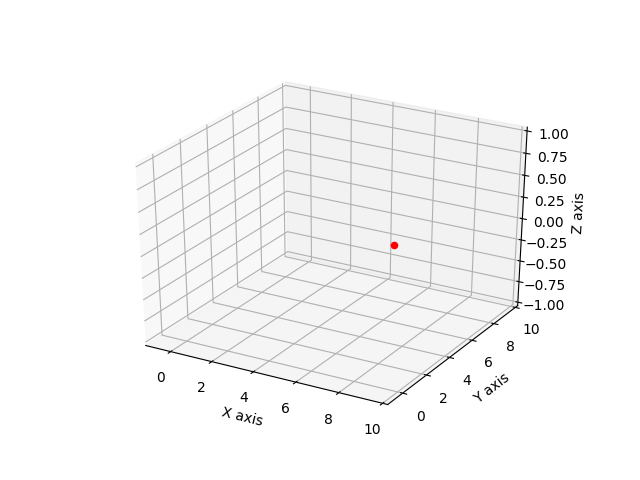

Shape = 2


<IPython.core.display.Javascript object>


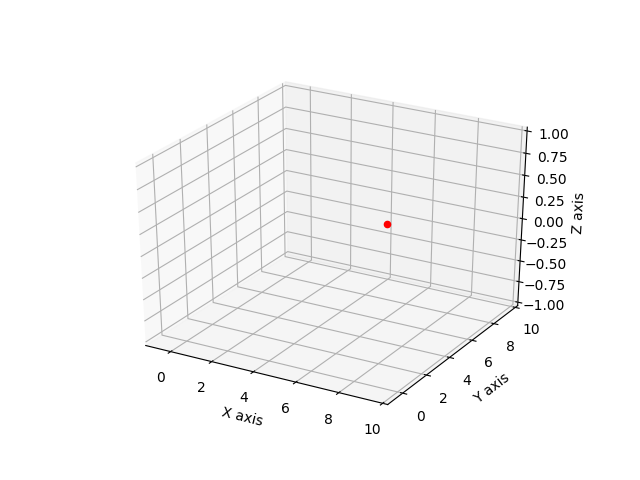

Shape = 2


<IPython.core.display.Javascript object>


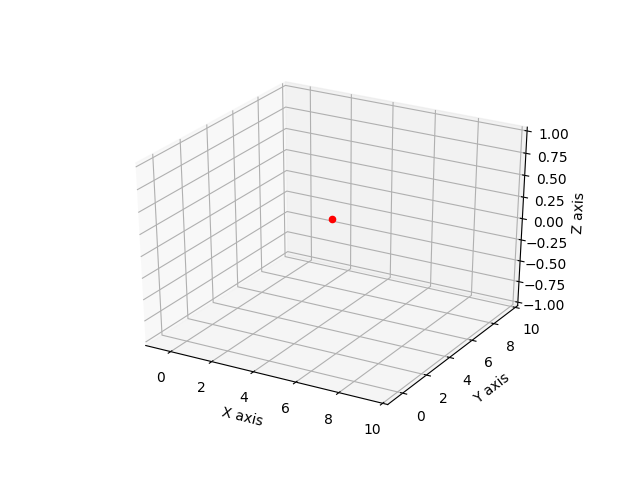

Shape = 2


<IPython.core.display.Javascript object>


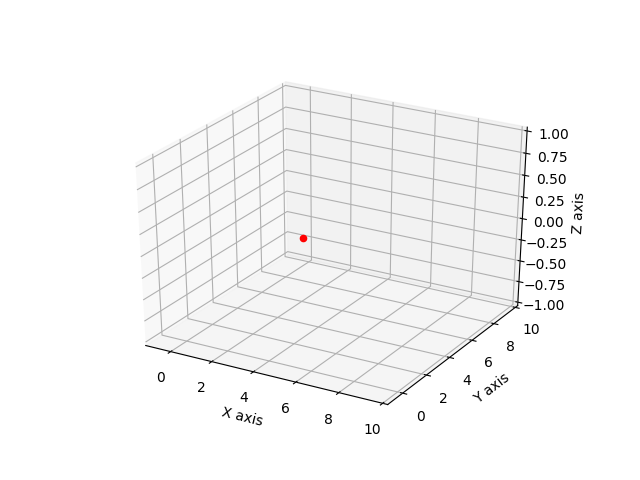

Shape = 2


<IPython.core.display.Javascript object>


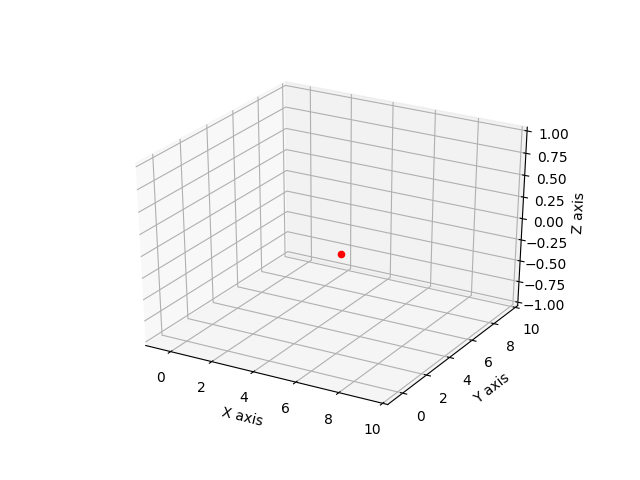

Shape = 2
simulating grid
grid simulated


<IPython.core.display.Javascript object>


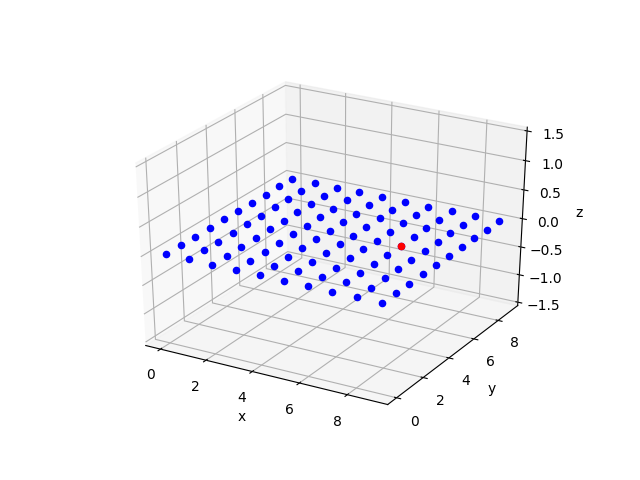

The acutal time is 0.0


<IPython.core.display.Javascript object>


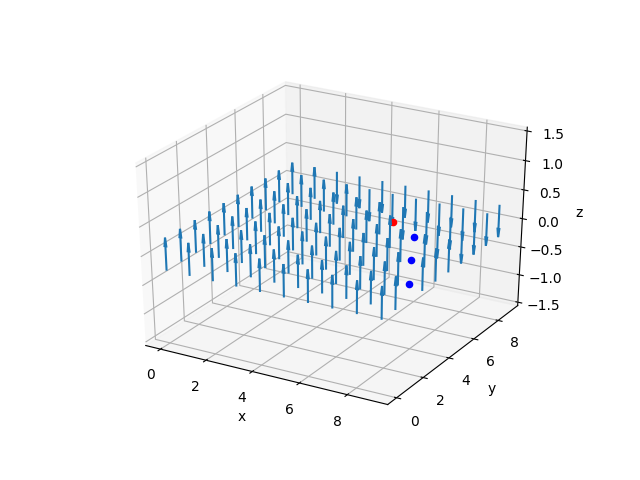

The acutal time is 1.008e-07


<IPython.core.display.Javascript object>


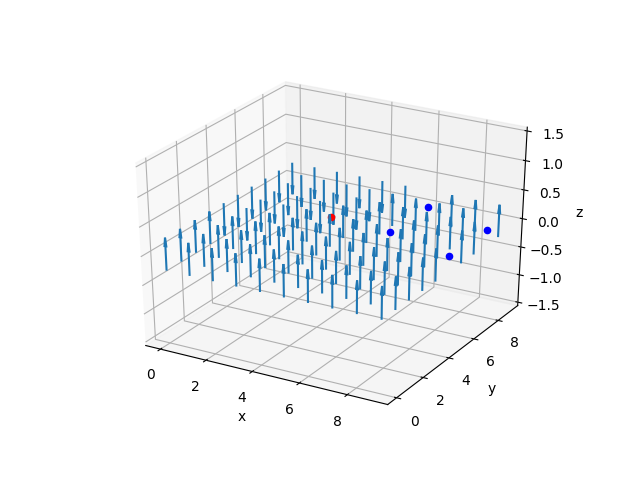

The acutal time is 2.016e-07


<IPython.core.display.Javascript object>


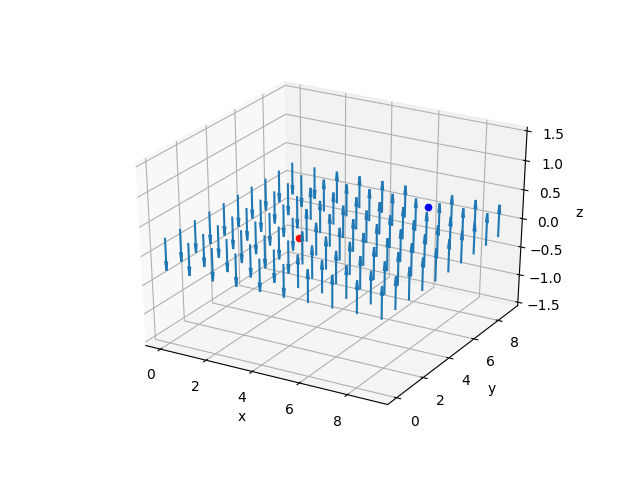

The acutal time is 3.024e-07


<IPython.core.display.Javascript object>


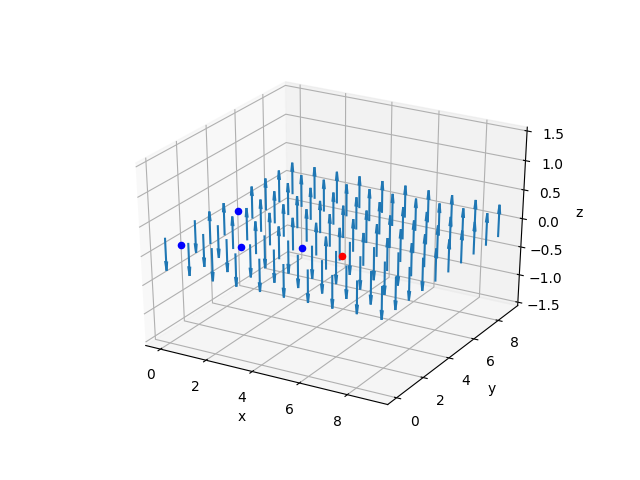

The acutal time is 4.032e-07
[-2.22917056e+09+0.j  2.81609731e+08+0.j  0.00000000e+00+0.j]
E field specs
test pass count = 148
test fail count = 0
points of failer
[]

H field specs
test pass count = 148
test fail count = 0
points of failer
[]
NOTHING NEEDS FIXED


In [15]:
test_charge_4()